# Sample size

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

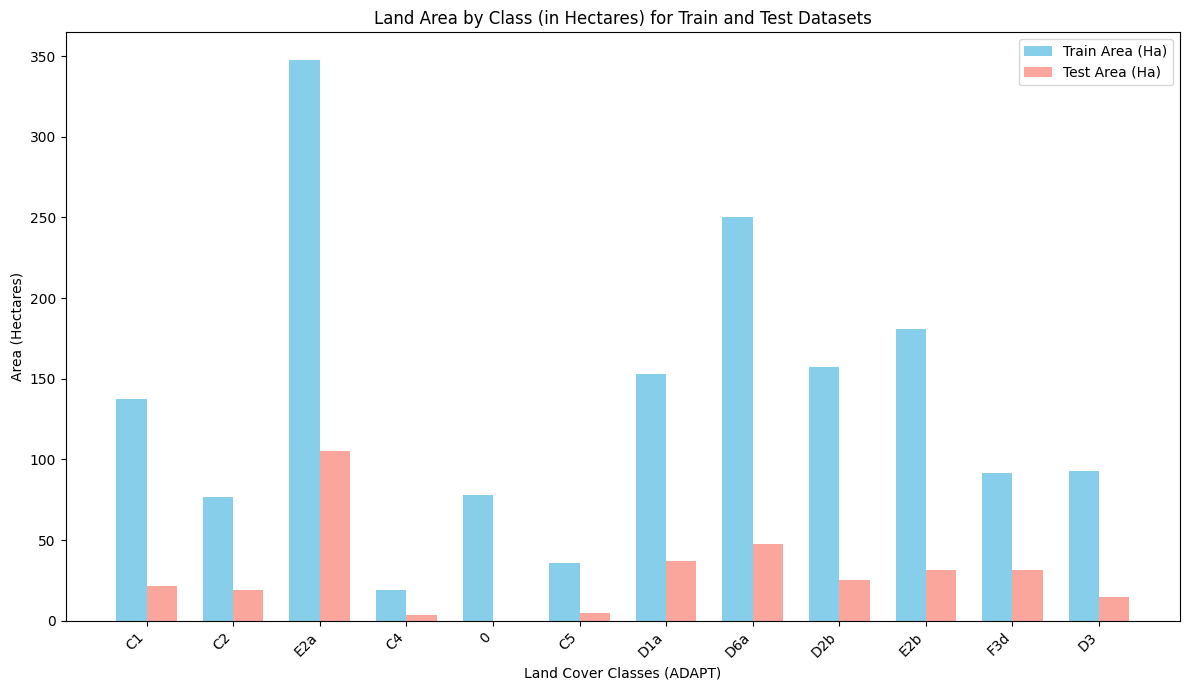

In [9]:
# Load the shapefiles
train_gdf = gpd.read_file('../data/labels/labels_train.shp')
test_gdf = gpd.read_file('../data/labels/labels_test.shp')

# Calculate area in hectares (1 hectare = 10,000 square meters)
train_gdf['Area_Ha'] = train_gdf['Shape_Area'] / 10000
test_gdf['Area_Ha'] = test_gdf['Shape_Area'] / 10000

# Group by land cover class ('ADAPT') and calculate the total area per class in hectares
train_area_by_class = train_gdf.groupby('ADAPT')['Area_Ha'].sum()
test_area_by_class = test_gdf.groupby('ADAPT')['Area_Ha'].sum()

# Get all unique classes from both datasets
all_classes = set(train_area_by_class.index).union(set(test_area_by_class.index))

# Ensure both Series have all classes by reindexing and filling missing entries with 0
train_area_by_class = train_area_by_class.reindex(all_classes, fill_value=0)
test_area_by_class = test_area_by_class.reindex(all_classes, fill_value=0)

# Convert the index to a list of labels for plotting
labels = list(all_classes)

# Plotting
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12, 7))

width = 0.35
ax.bar(x - width/2, train_area_by_class.values, width, label='Train Area (Ha)', color='skyblue')
ax.bar(x + width/2, test_area_by_class.values, width, label='Test Area (Ha)', color='salmon', alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_title("Land Area by Class (in Hectares) for Train and Test Datasets")
ax.set_xlabel("Land Cover Classes (ADAPT)")
ax.set_ylabel("Area (Hectares)")
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Load grid shapefiles for Morridge and North Lees
morridge_grid = gpd.read_file(morridge_grid_path)
north_lees_grid = gpd.read_file(north_lees_grid_path)

# Calculate total area of each grid in hectares
morridge_total_area_ha = morridge_grid['geometry'].area.sum() / 10000  
north_lees_total_area_ha = north_lees_grid['geometry'].area.sum() / 10000  

# Sum total area of both grids
total_grid_area_ha = morridge_total_area_ha + north_lees_total_area_ha

# Calculate labeled area in train and test (already converted to hectares in previous code)
total_labeled_area_ha = train_gdf['Area_Ha'].sum() + test_gdf['Area_Ha'].sum()

# Calculate proportion of labeled area over total grid area
labeled_area_proportion = total_labeled_area_ha / total_grid_area_ha
labeled_area_percentage = labeled_area_proportion * 100

print(f"Total Morridge Grid Area: {morridge_total_area_ha:.2f} hectares")
print(f"Total North Lees Grid Area: {north_lees_total_area_ha:.2f} hectares")
print(f"Combined Grid Area (Morridge + North Lees): {total_grid_area_ha:.2f} hectares")
print(f"Total Labeled Area (Train + Test): {total_labeled_area_ha:.2f} hectares")
print(f"Labeled Area Proportion of Total: {labeled_area_proportion:.2%}")
print(f"Labeled Area Percentage of Total: {labeled_area_percentage:.2f}%")


Total Morridge Grid Area: 44100.00 hectares
Total North Lees Grid Area: 12100.00 hectares
Combined Grid Area (Morridge + North Lees): 56200.00 hectares
Total Labeled Area (Train + Test): 1962.45 hectares
Labeled Area Proportion of Total: 3.49%
Labeled Area Percentage of Total: 3.49%
